#### Based on Given featutres we need to find weather the employee will leave the company or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [3]:
data = pd.read_csv('./HR-Employee-Attrition.csv')

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# head data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# tail data
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
# columns in data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data.head(pd.set_option('display.max_columns', None))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [9]:
# data shape
data.shape

(1470, 35)

In [10]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# lopp to know the columns in category
category_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        category_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("================================================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [12]:
data.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [13]:
data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [15]:
data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [16]:
data.Education.value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [17]:
data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [18]:
data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [19]:
data.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [20]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [21]:
data.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [22]:
data.StockOptionLevel.value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

## Exploratary Data Analysis

### Univariate Analysis

In [23]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [24]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
# descrete/categorial columns
data1 = data[['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus',  'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance']]
# numerical columns
data2 = data[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

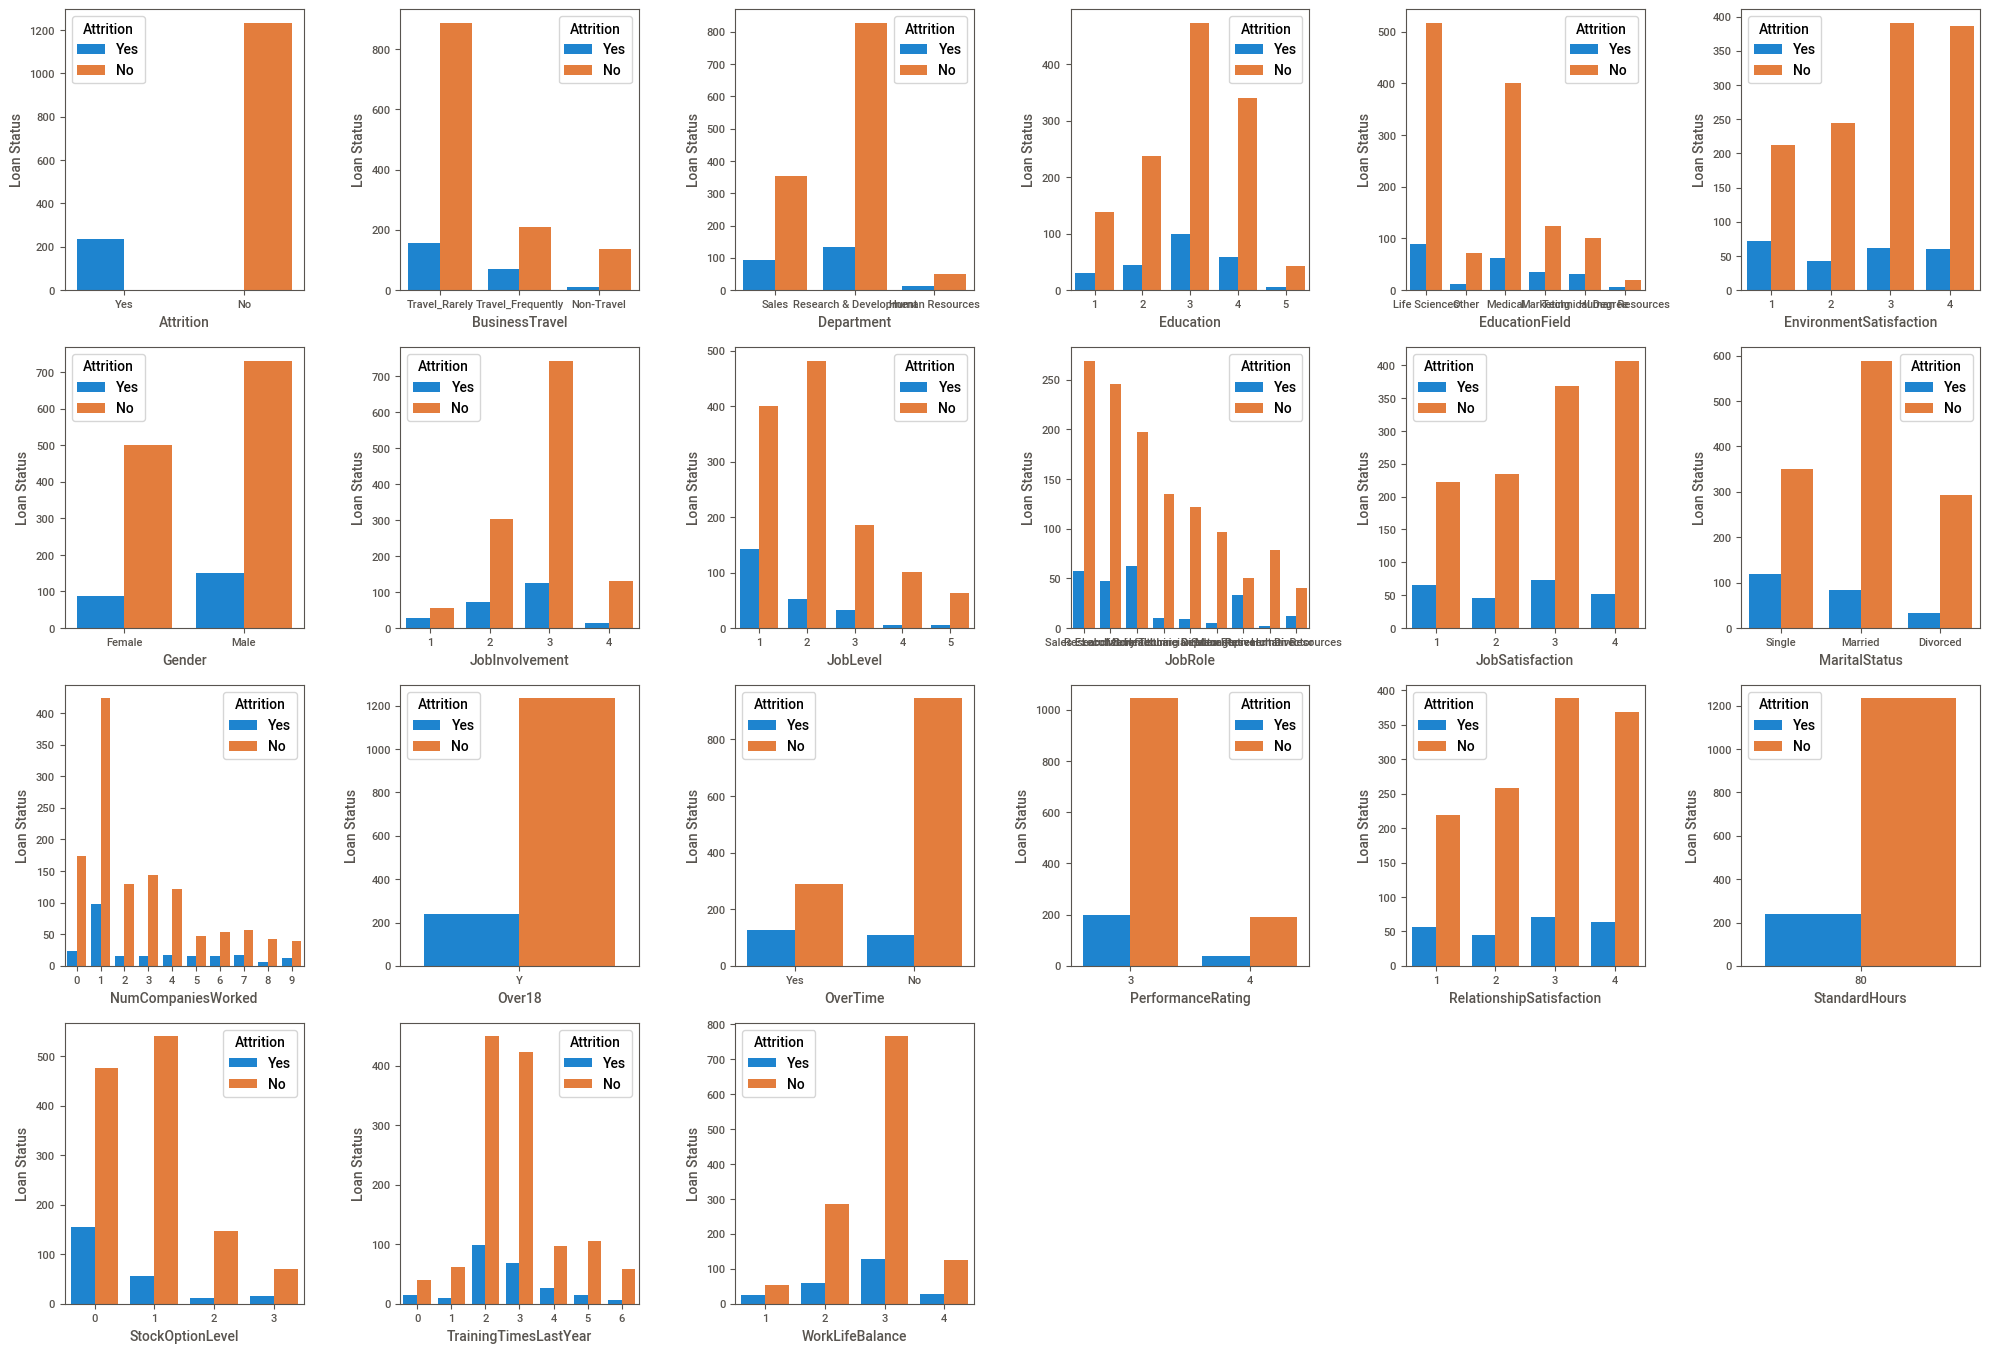

In [27]:
# categorial column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
        if plotnumber<=36:
            ax=plt.subplot(6,6,plotnumber)
            sns.countplot(x=data1[column],hue=data['Attrition'])
            plt.xlabel(column,fontsize=10)
            plt.ylabel('Loan Status',fontsize=10)
        plotnumber+=1
plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 12, not 13

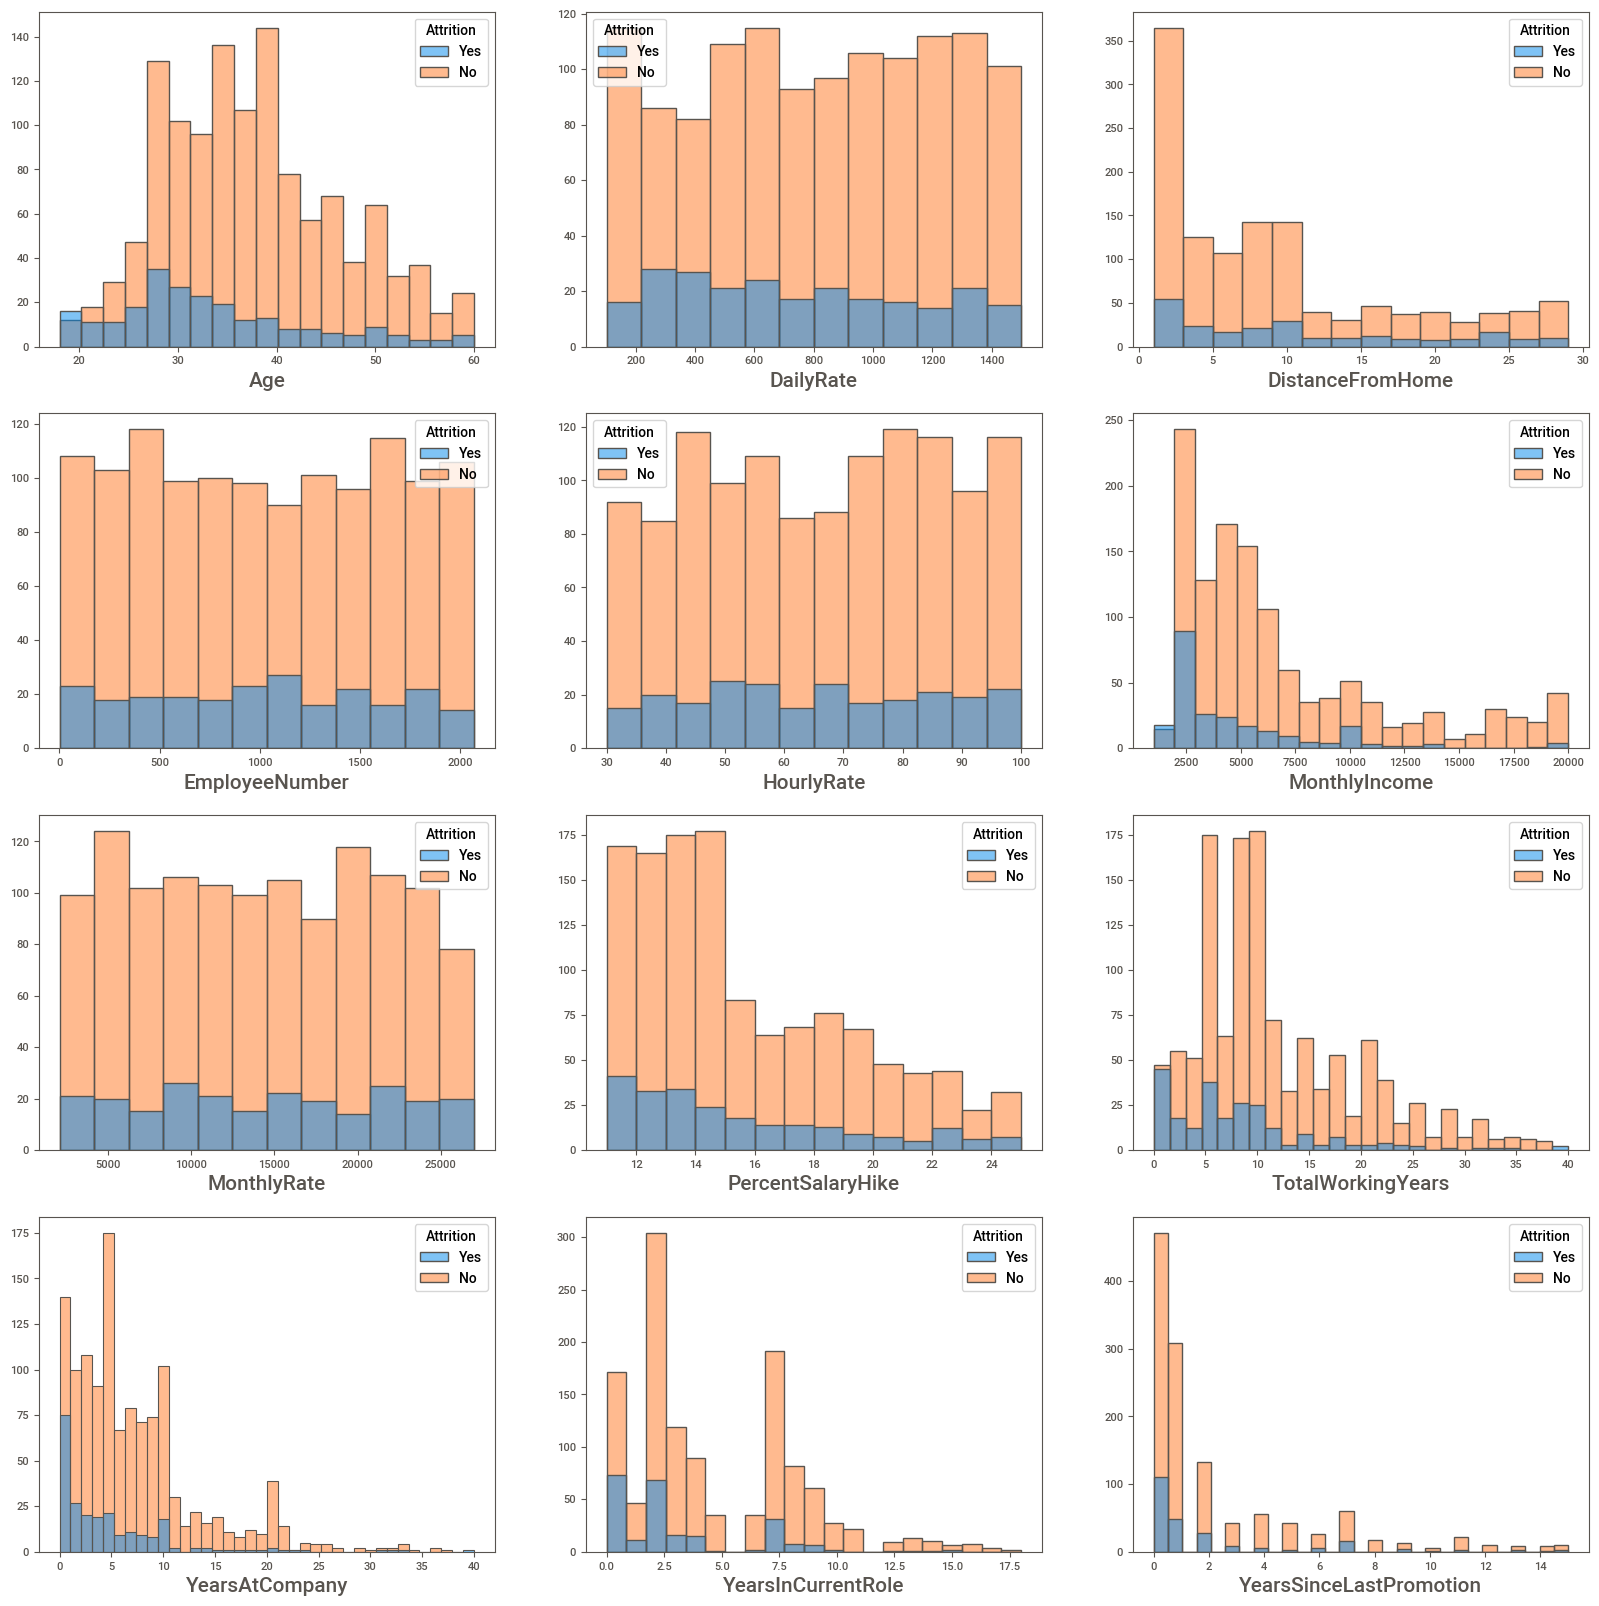

In [28]:
# Numerical column
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in data2:
        if plotnumber <= 13:
            ax = plt.subplot(4, 3, plotnumber)  
            sns.histplot(x=data2[column], hue=data['Attrition'])
            plt.xlabel(column, fontsize=15)
            plt.ylabel('',fontsize=15)
            plotnumber += 1

plt.tight_layout()
plt.show()

## Data preprocessing

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Encoding

In [31]:
data['Attrition'] = data.Attrition.replace({'Yes': 1, 'No': 0})

In [32]:
# Using Label encoder since BusinessTravel has multiple categories
encoder = LabelEncoder()
businessTravel = encoder.fit_transform(data.BusinessTravel)

# coverting businessTravel to dataframe and replace in original data
data['BusinessTravel'] = pd.DataFrame(businessTravel)

In [33]:
# Using Label encoder since Department has multiple categories
encoder = LabelEncoder()
department = encoder.fit_transform(data.Department)

# coverting department to dataframe and replace in original data
data['Department'] = pd.DataFrame(department)

In [34]:
# Using Label encoder since EducationField has multiple categories
encoder = LabelEncoder()
edu_field = encoder.fit_transform(data.EducationField)

# coverting edu_field to dataframe and replace in original data
data['EducationField'] = pd.DataFrame(edu_field)

In [35]:
data['Gender'] = data.Gender.replace({'Male': 1, 'Female': 0})

In [36]:
# Using Label encoder since JobRole has multiple categories
encoder = LabelEncoder()
job_role = encoder.fit_transform(data.JobRole)

# coverting job_role to dataframe and replace in original data
data['JobRole'] = pd.DataFrame(job_role)

In [37]:
# Using Label encoder since Material Status has multiple categories
encoder = LabelEncoder()
material_status = encoder.fit_transform(data.MaritalStatus)

# coverting job_role to dataframe and replace in original data
data['MaritalStatus'] = pd.DataFrame(material_status)

In [38]:
data['Over18'] = data.Over18.replace({'Y': 1})

In [39]:
data['OverTime'] = data.OverTime.replace({'Yes': 1, 'No': 0})

In [40]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [41]:
stdev = []
for column in data.columns:
    if data[column].dtype == 'int64':
        if np.std(data[column]) == 0:
            stdev.append(column)

In [42]:
stdev

['EmployeeCount', 'Over18', 'StandardHours']

In [43]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [44]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


<Axes: >

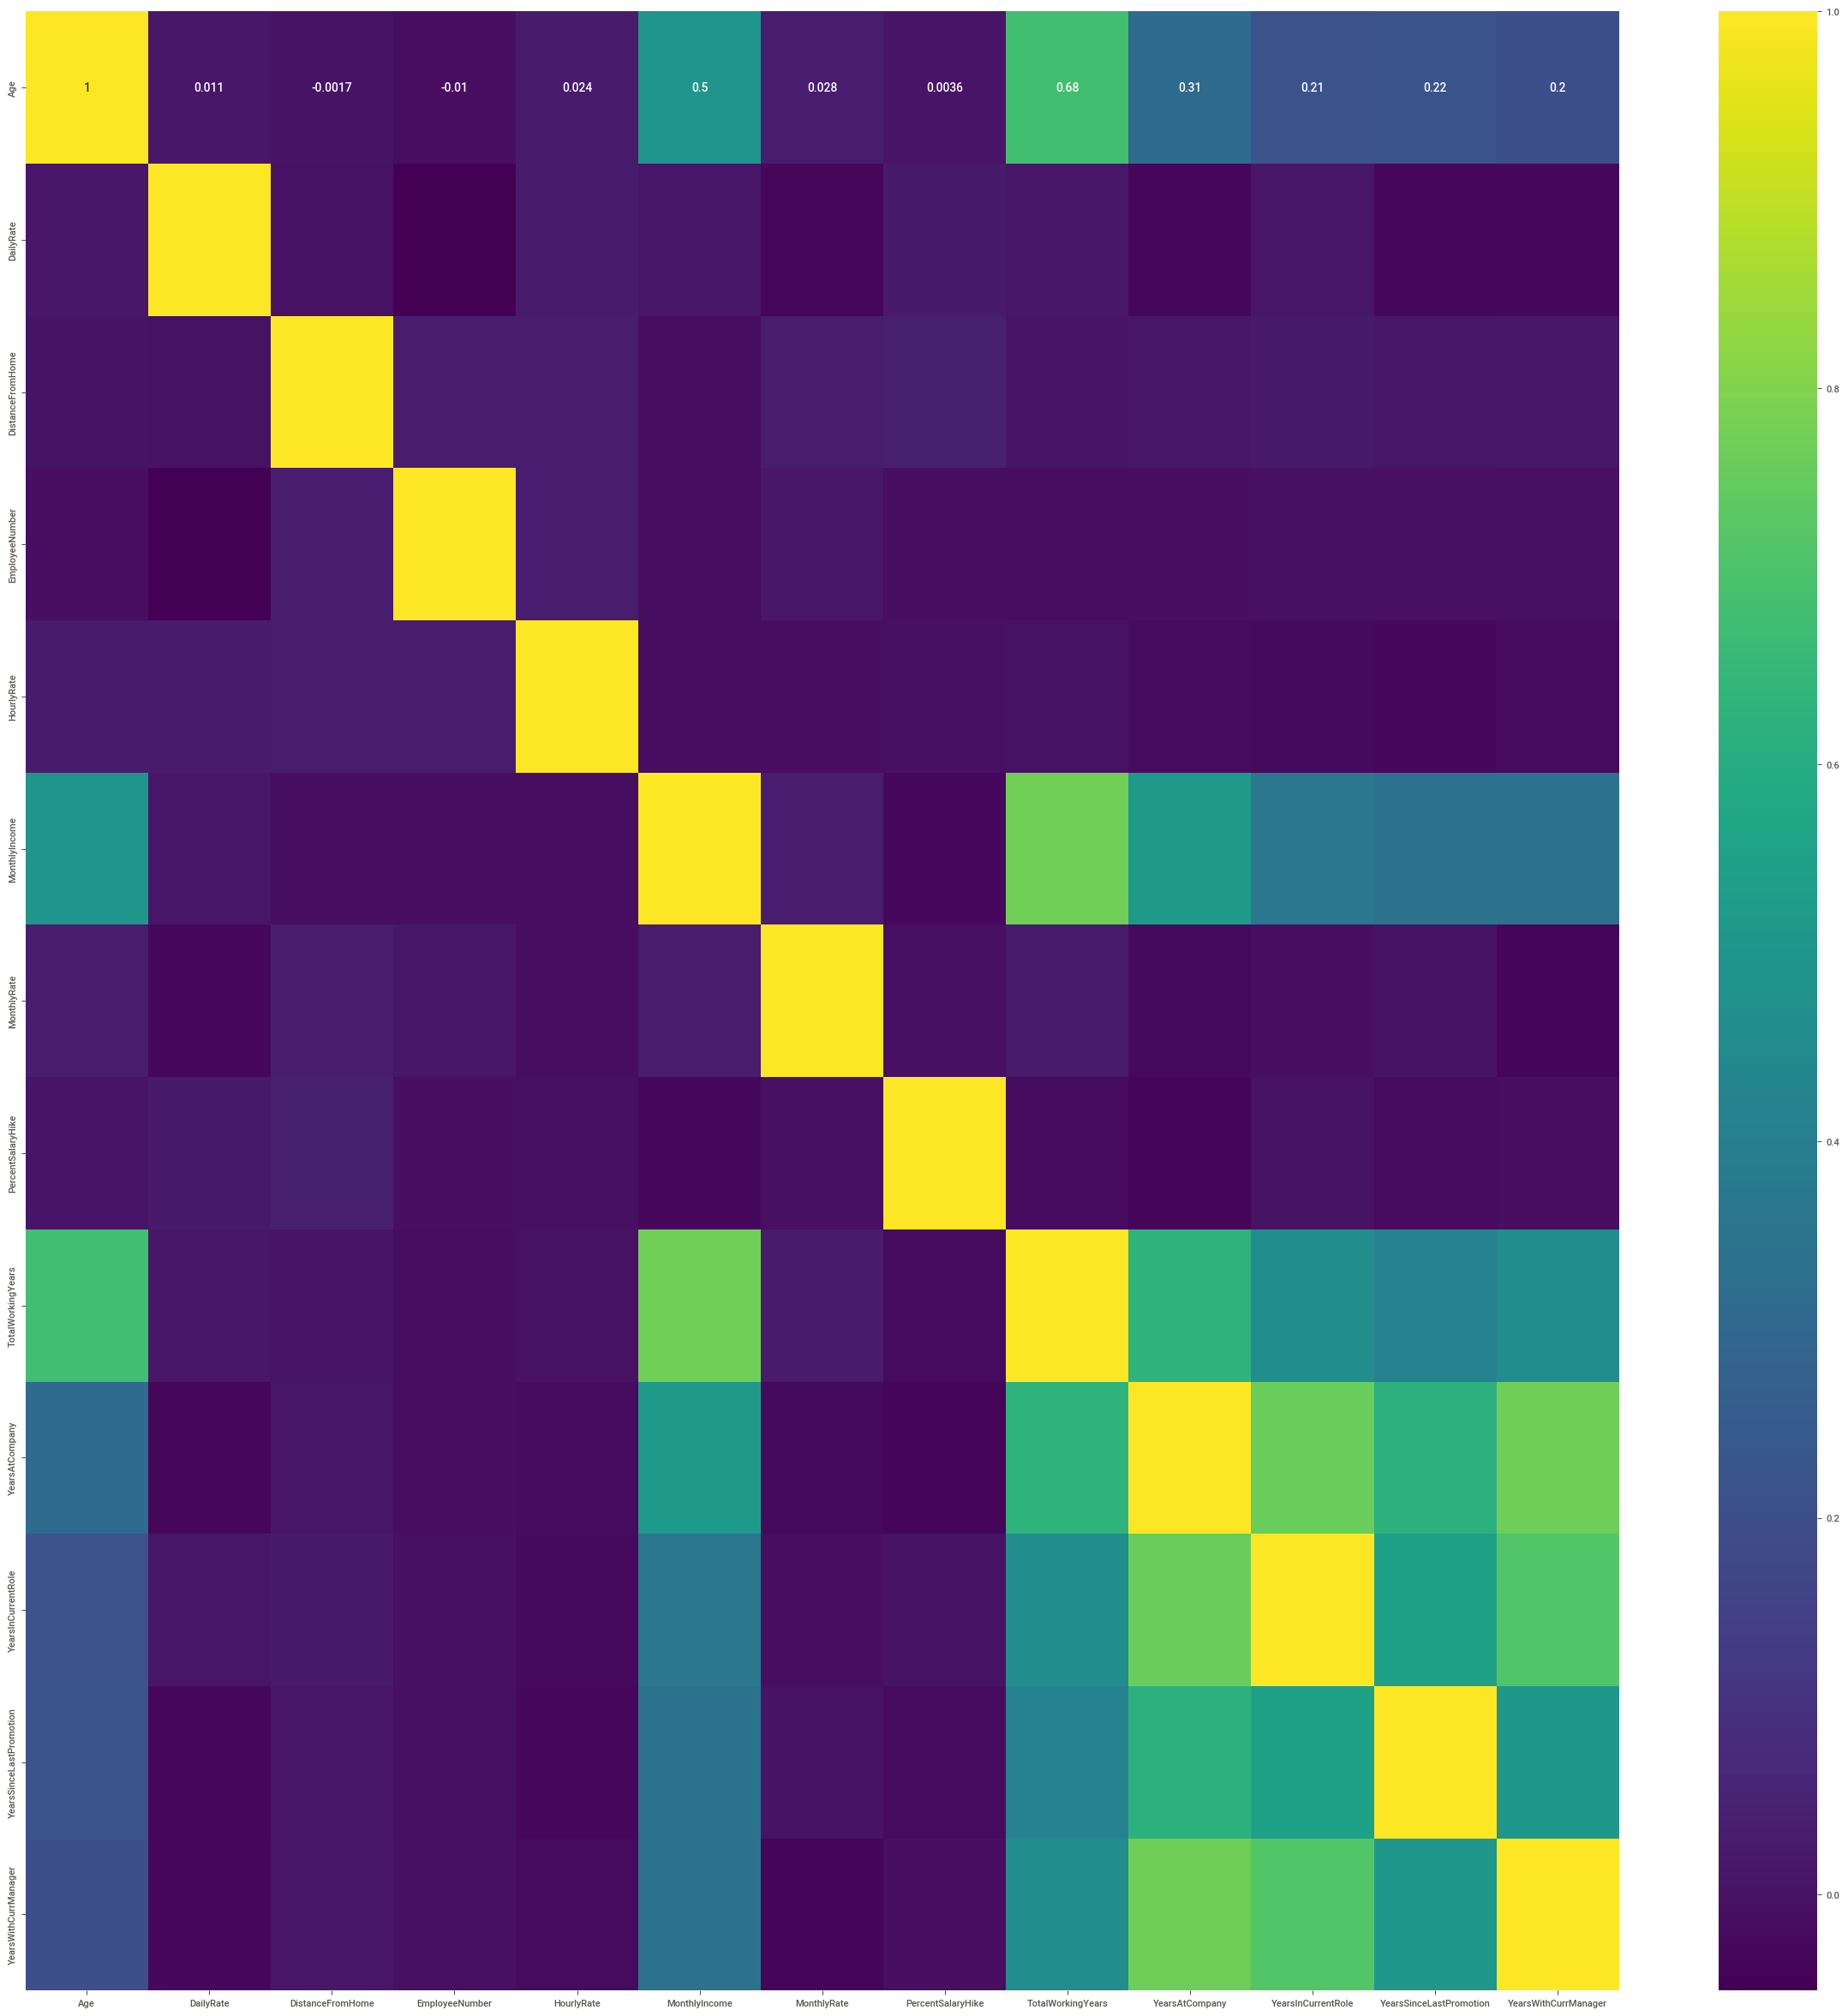

In [45]:
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(), annot=True, cmap='viridis', annot_kws={"size": 10})

In [46]:
## plitting the data
X = data.drop('Attrition', axis=1)
y = data.Attrition

In [47]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [49]:
y_train.value_counts()

Attrition
0    979
1    197
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [52]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 979, 1: 197})
Counter({1: 979, 0: 979})


## Model Implementation

In [53]:
model_dt = DecisionTreeClassifier()

In [54]:
model_dt.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier()

In [55]:
y_prediction_sm = model_dt.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_prediction_sm)

0.7448979591836735

In [57]:
# traning accuracy
y_train_accuracy = model_dt.predict(x_train)
accuracy_score(y_train, y_train_accuracy)

1.0

## Hyperparameter Tunning

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ("gini", "entropy"),
    "max_depth": (list(range(1, 20))),
    "min_samples_split": [2,3,4],
    "min_samples_leaf": list(range(1, 20))
}

tree_cf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_cf, params, scoring='f1', n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train_sm, y_train_sm)
best_params = tree_cv.best_params_
print(best_params)

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [60]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, min_samples_leaf= 1, min_samples_split= 4)
model.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4)

In [61]:
y_prediction_sm1 = model.predict(x_test)

In [62]:
accuracy_score(y_test,y_prediction_sm1)

0.7346938775510204

In [64]:
confusion_matrix(y_test, y_prediction_sm1)

array([[200,  54],
       [ 24,  16]], dtype=int64)

In [65]:
from sklearn.ensemble import RandomForestClassifier

##### Note: we can directly add the n_estimators and max_depth, min_samples_leaf, and min_samples_split to the classifire or find the value using the RandomizedSerchCV method to get the best_params_ value

#### Incase of using the RandomizedSerchCV method follow below steps

In [86]:
# n_estimators = [int(x) for x in np.lineSpace(start=200, stop=2000, num=10)]
# max_depth = [int(x) for x in np.lineSpace(10, 110, num=11)]
# min_samples_leaf = [1,2,3,4]
# min_samples_split = [2, 5, 10]
# bootstrap=[True, False]

# random_grid = {
#     'n_estimators' : n_estimators,
#     'max_depth' : max_depth,
#     'min_samples_leaf' : min_samples_leaf,
#     'min_samples_split' : min_samples_split,
#     'bootstrap' : bootstrap
# }

# mdoelRandom = RandomizedSerchCV(random_state=42)
# rf_cv = RandomizedSerchCV(estimators=mdoelRandom, scoring="f1", params_distributions=random_grid, n_iter=100, cv=3)

# rf_cv.fit(x_train_sm, y_train_sm)
# rf_best_params = rf_cv.best_params
# print(rf_best_params)

In [94]:
mdoelRandom = RandomForestClassifier(n_estimators=100, max_depth=7, class_weight='balanced', min_samples_leaf=1, min_samples_split=4)
mdoelRandom.fit(x_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=4)

In [95]:
y_random_predict = mdoelRandom.predict(x_test)

In [96]:
# accuracy Score
accuracy_score(y_test, y_random_predict)

0.7993197278911565

In [97]:
print(classification_report(y_test, y_random_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       254
           1       0.32      0.42      0.37        40

    accuracy                           0.80       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.83      0.80      0.81       294



In [98]:
print(confusion_matrix(y_test, y_random_predict))

[[218  36]
 [ 23  17]]
